In [42]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import random
import joblib

In [43]:
# Fixando seed para replicabilidade
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

In [44]:
# reading data
df = pd.read_csv('../data/salary/processed-salary.csv')

# print number of columns
print("N OF COLUMNS:",len(df.columns))

# print number of rows
print("N OF LINES",len(df.index))
df.head()

N OF COLUMNS: 109
N OF LINES 32561


workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0          0.0                    0.0                  0.0   
1          0.0                    0.0                  0.0   
2          0.0                    0.0                  0.0   
3          0.0                    0.0                  0.0   
4          0.0                    0.0                  0.0   

   workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
0                     0.0                0.0                     0.0   
1                     0.0                0.0                     0.0   
2                     0.0                1.0                     0.0   
3                     0.0                1.0                     0.0   
4                     0.0                1.0                     0.0   

   workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
0                         0.0                  1.0                    0.0   
1                         1.0                  0.0                    0.0   
2                         0.0                  0.0                    0.0   
3                         0.0                  0.0                    0.0   
4                         0.0                  0.0                    0.0   

   education_10th  ...  native-country_United-States  native-country_Vietnam  \
0             0.0  ...                           1.0                     0.0   
1             0.0  ...                           1.0                     0.0   
2             0.0  ...                           1.0                     0.0   
3             0.0  ...                           1.0                     0.0   
4             0.0  ...                           0.0                     0.0   

   native-country_Yugoslavia  age  fnlwgt  education-num  capital-gain  \
0                        0.0   39   77516             13          2174   
1                        0.0   50   83311             13             0   
2                        0.0   38  215646              9             0   
3                        0.0   53  234721              7             0   
4                        0.0   28  338409             13             0   

   capital-loss  hours-per-week  salary  
0             0              40   <=50K  
1             0              13   <=50K  
2             0              40   <=50K  
3             0              40   <=50K  
4             0              40   <=50K  

[5 rows x 109 columns]

In [45]:
# data splitting
x_display, y_display = df.columns[:-1], df.columns[-1]

# training and test sets
X_train = joblib.load("../data/salary/X_train.joblib")
X_test = joblib.load("../data/salary/X_test.joblib")
y_train = joblib.load("../data/salary/y_train.joblib")
y_test = joblib.load("../data/salary/y_test.joblib")

In [46]:
# peguei código de:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# searching best params
rf = RandomForestClassifier(random_state=random_state)

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5,
                                 random_state=random_state)

rand_search.fit(X_train, y_train)

best_params = rand_search.best_estimator_.get_params()

# training model with best params
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.865806847842776

In [47]:
# visualizando uma das árvores
tree = rf.estimators_[0]
dot_data = export_graphviz(tree,
                            feature_names=x_display,  
                            filled=True,  
                            impurity=False, 
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)


(process:11940): GLib-GIO-WARNING **: 18:59:19.545: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2312.33.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:11940): GLib-GIO-WARNING **: 18:59:19.548: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.9.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:11940): GLib-GIO-WARNING **: 18:59:19.568: Unexpectedly, UWP app `57868Codaapp.37800EEDB46F1_1.0.17.0_x64__4bn2s5v6tep1y' (AUMId `57868Codaapp.37800EEDB46F1_4bn2s5v6tep1y!App') supports 9 extensions but has no verbs

(process:11940): GLib-GIO-WARNING **: 18:59:19.582: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2024.223.300_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 4 extensions but has no verbs


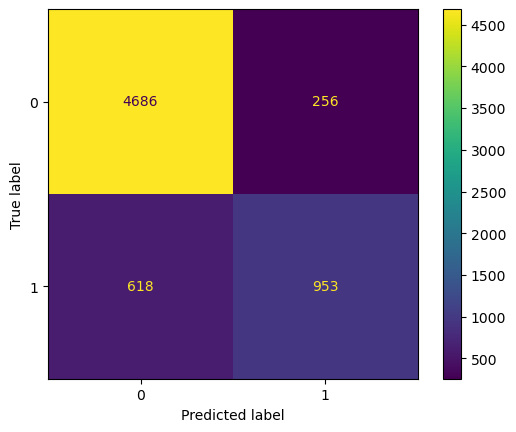

In [48]:
# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [67]:
# Selecionando instâncias
selected_instances = joblib.load('../data/salary/selected_instances.joblib')
instance_low = selected_instances['instance_low']
instance_medium = selected_instances['instance_medium']
instance_high = selected_instances['instance_high']

# Banco de dados SALARY

## Aplicando SHAP

In [53]:
# código: https://www.kaggle.com/code/vikumsw/explaining-random-forest-model-with-shapely-values
import shap
shap.initjs()

explainer = shap.TreeExplainer(rf)

In [54]:
explainer = shap.TreeExplainer(rf)
shap_values_instance = explainer.shap_values(instance_low)
shap.force_plot(explainer.expected_value[1], shap_values_instance[1], instance_low, feature_names=x_display)

In [55]:
shap_values_instance = explainer.shap_values(instance_medium)
shap.force_plot(explainer.expected_value[1], shap_values_instance[1], instance_medium, feature_names=x_display)

In [56]:
shap_values_instance = explainer.shap_values(instance_high)
shap.force_plot(explainer.expected_value[1], shap_values_instance[1], instance_high, feature_names=x_display)

## Aplicando LIME

In [57]:
# lime to explain random forests from oficial docs
# https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html

import lime
import lime.lime_tabular

In [58]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=x_display.values.tolist(), class_names=['bad', 'good'])
exp = explainer.explain_instance(instance_low, rf.predict_proba, num_features=10, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

In [59]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=x_display.values.tolist(), class_names=['bad', 'good'])
exp = explainer.explain_instance(instance_medium, rf.predict_proba, num_features=10, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

In [60]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=x_display.values.tolist(), class_names=['bad', 'good'])
exp = explainer.explain_instance(instance_high, rf.predict_proba, num_features=10, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)